<a href="https://colab.research.google.com/github/AngKS/practices/blob/master/GAN/Pokemon_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [12]:
!nvidia-smi

Mon Feb 28 05:28:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
# using tensorflow ImageDataGenerator to import Pokemon Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1, 
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "/content/drive/MyDrive/pokemonGAN",
    target_size=(256, 256),
    batch_size=32


)


Found 819 images belonging to 1 classes.


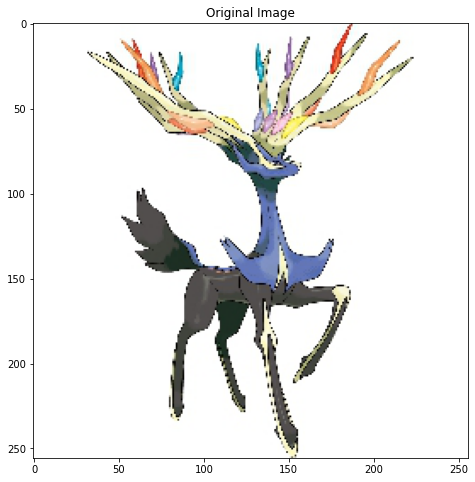

In [18]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

images = load_img(
    "/content/drive/MyDrive/pokemonGAN/pokemon_jpg/716.jpg",
    target_size=(256, 256)
)
img_tensor = img_to_array(images)
img_tensor = np.expand_dims(img_tensor, axis=0)

# plot images without Augmentation
plt.figure(figsize=(8, 8))
plt.imshow(img_tensor[0].astype('uint8'))
plt.title("Original Image")
plt.show()


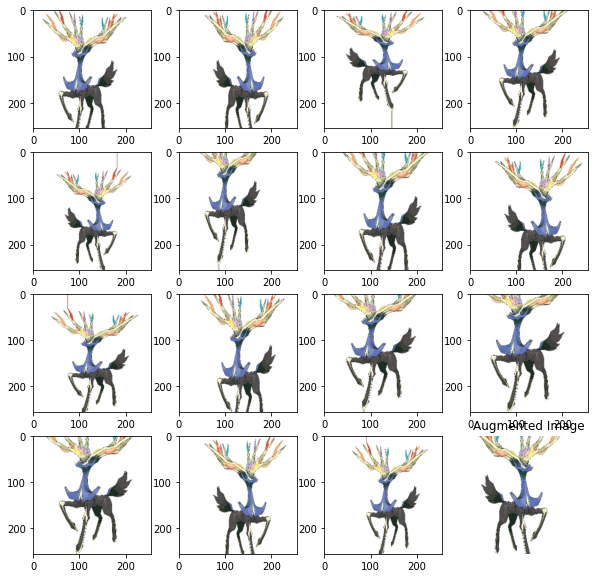

In [19]:
# After Augmentation

# create a batch of this one image
pic = datagen.flow(img_tensor, batch_size=1)

plt.figure(figsize=(10, 10))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    batch = pic.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.title("Augmented Image")
plt.axis('off')
plt.show()

In [25]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential

In [30]:
discriminator = Sequential(
    [
        Input(256, 256, 3),
        Conv2D(64, (3, 3), strides=2, padding='same'),
        BatchNormalization(momentum=0.8),
        LeakyReLU(alpha=0.2),

        Conv2D(64, (3, 3), strides=2, padding='same'),
        BatchNormalization(momentum=0.8),
        LeakyReLU(alpha=0.2),

        Conv2D(64, (3, 3), strides=2, padding='same'),
        BatchNormalization(momentum=0.8),
        LeakyReLU(alpha=0.2),

        Conv2D(64, (3, 3), strides=2, padding='same'),
        BatchNormalization(momentum=0.8),
        LeakyReLU(alpha=0.2),

        Conv2D(64, (3, 3), strides=2, padding='same'),
        BatchNormalization(momentum=0.8),
        LeakyReLU(alpha=0.2),

        Conv2D(64, (3, 3), strides=2, padding='same'),
        BatchNormalization(momentum=0.8),
        LeakyReLU(alpha=0.2),

        Dropout(0.2),
                            
        Conv2D(128, (3, 3), strides=1, padding='same'),
        GlobalAveragePooling2D(),
        Dense(1024),
        Dense(256),
        Dense(1, activation='sigmoid')
    ],
    name="Discriminator"
)

TypeError: ignored